# Games Sales

This project sets out to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.
We'll use data up to 2016 to help plan for a campaign in 2017.

In order  to carry out the analysis, we will have to perform the following steps.

- Fixing and enriching data
    - Changing datatypes, removing duplicates, filling missing values and adding any useful columns
    
    
- A preliminary analysis of the data, using data visualisations to assist us
    - analysing the number of games per year
    - looking at sales per platform
    - identifying the relevent years for our analysis
    - identifying potentially profitable platforms
    - studying recent sales per platform
    - measuring the effect of user and critic reviews on sales#
    - visualising the distribution of games and sales by genre


- Creating user profiles for each region
    - Identifying the top platforms in each region
    - Identifying the top genres in each region
    - Looking at ESRB affects sales in different regions
    
    
- Testing given hypotheses:
    - that average user ratings of the Xbox One and PC platforms are the same.
    - that average user ratings for the Action and Sports genres are different.

### Initialisation

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats as st
import itertools
import warnings
import math
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)

plt.style.use('seaborn-pastel')

In [2]:
#importing data
df = pd.read_csv('/datasets/games.csv')

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are a number of notable issues.

- columns need renaming
- there are missing values in all but platform and sales columns
- incorrect column datatypes

After renaming columns, we can go through each of the columns, one by one, addressing the issues.

### Preparing data

#### Renaming columns

In [4]:
#renaming columns to lowercase
df.columns = ['name', 'platform', 'release_year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.head()

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### `name`

there are a couple of null values in this column

In [5]:
#checking null values
df[df['name'].isnull()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There is no obvious way to impuate the missing names, we can drop these rows without causing an issue.

In [6]:
#dropping nan names
df = df[df['name'].notnull()]

In [7]:
#checking for duplicates
df[df.duplicated(subset=['name', 'platform', 'release_year']) == True]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [8]:
#checking particular game
df[df['name'] == 'Madden NFL 13']

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


This does appear to be a duplicate with almost no sales data, we can drop it without issue.

In [9]:
#dropping row and checking fix
df = df.drop(16230)
df[df['name'] == 'Madden NFL 13']

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


#### `platform`
From the dataframe info, there was no obvious issues.

In [10]:
#checking details
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1330
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

All seems in order, no changes needed.

#### `release_year`

There were ~250 missing values. 

If there are games with the same name released on other platforms, we can take the most common release year for that game and use it to fill in missing values.

In [11]:
#checking details
df['release_year'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: release_year, dtype: float64

In [12]:
#filling in nan years from other versions of game

for name in df[df['release_year'].isnull()]['name'].unique():
    try:
        mode = df[df['name'] == name]['release_year'].mode()[0]
        #print(mode)
        
        df.loc[(df['name'] == name) & (df['release_year'].isnull()), 'release_year'] = mode
    except:
        pass

#dropping those that we have no release year data for
df = df[df['release_year'].notnull()]
#checking fix
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16566 non-null  object 
 1   platform      16566 non-null  object 
 2   release_year  16566 non-null  float64
 3   genre         16566 non-null  object 
 4   na_sales      16566 non-null  float64
 5   eu_sales      16566 non-null  float64
 6   jp_sales      16566 non-null  float64
 7   other_sales   16566 non-null  float64
 8   critic_score  8074 non-null   float64
 9   user_score    9933 non-null   object 
 10  rating        9867 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [13]:
#converting year to int
df['release_year'] = df['release_year'].astype('int')

#### `genre`

There were previously two missing values in this column.

In [14]:
#checking details
df['genre'].value_counts()

Action          3342
Sports          2332
Misc            1735
Role-Playing    1484
Shooter         1311
Adventure       1294
Racing          1236
Platform         879
Simulation       860
Fighting         842
Strategy         678
Puzzle           573
Name: genre, dtype: int64

In [15]:
#checking missing values
df[df['genre'].isnull()]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


The rows with missing values must have been removed in earlier steps.

#### `na_sales`

No previous issues noted.

In [16]:
#checking details
df['na_sales'].describe()

count    16566.000000
mean         0.263991
std          0.816496
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

#### `eu_sales`

In [17]:
#checking details
df['eu_sales'].describe()

count    16566.000000
mean         0.145822
std          0.505378
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

#### `jp_sales`

In [18]:
#checking details
df['jp_sales'].describe()

count    16566.000000
mean         0.078025
std          0.310077
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

#### `other_sales`

In [19]:
#checking details
df['other_sales'].describe()

count    16566.000000
mean         0.047570
std          0.187482
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

No clear issues with any of the sales columns

#### `critic_score` and `user_score`

There were missing values in these columns


We can first check if there is a relationship between critic score and other columns. If there is a correlation, we can use data from those columns to fill in our missing critic scores.

For the purpose of filling in missing values we will replace tbd with NaN

In [20]:
#checking number of missing values
len(df[df['critic_score'].isnull()])

8492

In [21]:
#replacing tbds with nan and converting to float
df['user_score'].replace('tbd', np.nan, inplace = True)
df['user_score'] = df['user_score'].astype('float')
#checking number of missing values

len(df[df['user_score'].isnull()])   

9027

In [22]:
#filling nan values with medians from the same game on other plaforms
for name in df[df['critic_score'].isnull()]['name'].unique():
    try:
        median = df[df['name'] == name]['critic_score'].median()
        if np.isfinite(median):
            df.loc[(df['name'] == name) & (df['critic_score'].isnull()), 'critic_score'] = median
    except:
        pass

len(df[df['critic_score'].isnull()])

7532

In [23]:
#filling nan values with medians from the same game on other plaforms

for name in df[df['user_score'].isnull()]['name'].unique():
    try:
        median = df[df['name'] == name]['user_score'].median()
        if np.isfinite(median):
            df.loc[(df['name'] == name) & (df['user_score'].isnull()), 'user_score'] = median
    except:
        pass
#checking number of missing values
len(df[df['user_score'].isnull()])   

7928

We have managed to fill in some of the missing values, we might expect there to be a relationship between users scores and critic scores. If we have data for the user score of a game, we might be able to imputate the critic score and vice versa.

In [24]:
#checking the number of rows where we have user  score but not critic score
len(df[(df['critic_score'].isnull()) & df['user_score'].notnull()])

335

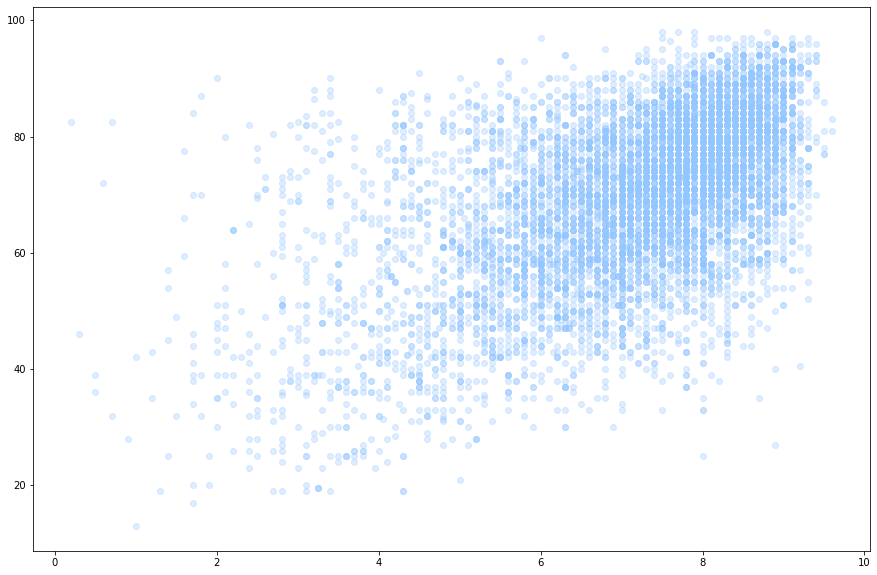

In [25]:
#investigating the relationship between user score and critic score.
temp_df = df[['user_score', 'critic_score', 'na_sales', 'other_sales', 'jp_sales']].dropna()

#temp_df.plot.scatter(x = 'user_score', y = 'critic_score' )

plt.figure(figsize=(15,10))
plt.scatter(temp_df['user_score'], temp_df['critic_score'], alpha = 0.3)

As expected, there does appear to be a positive correlation between user score and critic score. 

We can check how strong this relationship is and check for correlation with sales data.

In [26]:
temp_df.corr()

,user_score,critic_score,na_sales,other_sales,jp_sales
user_score,1.000000,0.547474,0.087416,0.057100,0.130487
critic_score,0.547474,1.000000,0.226460,0.188477,0.147560
na_sales,0.087416,0.226460,1.000000,0.720822,0.458849
other_sales,0.057100,0.188477,0.720822,1.000000,0.381159
jp_sales,0.130487,0.147560,0.458849,0.381159,1.000000


There is a moderate positive correlation between user score and critic score. 
We can do some naive clustering and check for the `critic_score`s of games with the same `user_score` plus or minus 0.2 then take the median of those games to fill in our missing critic score.




We'll create a temporary dataframe to calculate values from.

In [27]:
temp_df = df[df['user_score'].notnull()]

In [28]:
#filling nan values with medians from games with similar user score
for score in df[df['critic_score'].isnull()]['user_score'].unique():
    try:
        median = temp_df[abs(temp_df['user_score'] - float(score))<= 0.2]['critic_score'].median()
    
        if np.isfinite(median):
            df.loc[(df['user_score'] == score) & (df['critic_score'].isnull()), 'critic_score'] = median
    except:
        pass
    
len(df[df['critic_score'].isnull()])

7197

We've imputed as many as critic scores as possible, there are still missing values that we will leave for now.

`user_score`

There are a number of missing values in this column too. We can use the same techniques as above to imputate missing scores.


In [29]:
#checking number of missing user scores
len(df[df['user_score'].isnull()])   

7928

In [30]:
#checking how many rows contain a critic score but no user score
len(df[(df['user_score'].isnull()) & df['critic_score'].notnull()])

731

In [31]:
#creating a temporary datafram without null values for critic score
temp_df = df[df['critic_score'].notnull()]

In [32]:
#filling nan values with medians from games with similar user score
for score in df[df['user_score'].isnull()]['critic_score'].unique():
    try:
        median = temp_df[abs(temp_df['critic_score'] - float(score))<= 2]['user_score'].median()
    
        if np.isfinite(median):
            df.loc[(df['critic_score'] == score) & (df['user_score'].isnull()), 'user_score'] = median
    except:
        pass
    
len(df[df['user_score'].isnull()])

7197

Now we've filled in as many missing values as possible, it's important to check if these missing values are 'Missing At Random', in which case we can potentially remove rows with missing values without having a large affect on further analysis or there is a pattern to the rows with missing data.

It may well be that older games are more likely to be missing user scores, we can investigate this using a t-test on the average years of rows with NaN values and those without at the 0.05 significance level.

H0: There is no difference in the average release years of games missing user scores and those not missing user scores

H1: There is a difference in the average release years of games missing user scores and those not missing user scores

In [33]:
#slicing dataframe into rows with null values and those without
nan_years = df[df['user_score'].isnull()]['release_year']
non_nan_years = df[df['user_score'].notnull()]['release_year']

alpha = 0.05

results = st.ttest_ind(nan_years, non_nan_years, equal_var = True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 3.225054415235473e-122
We reject the null hypothesis


In [34]:
print(nan_years.mean())
print(non_nan_years.mean())


2005.2780325135473
2007.420856014516


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

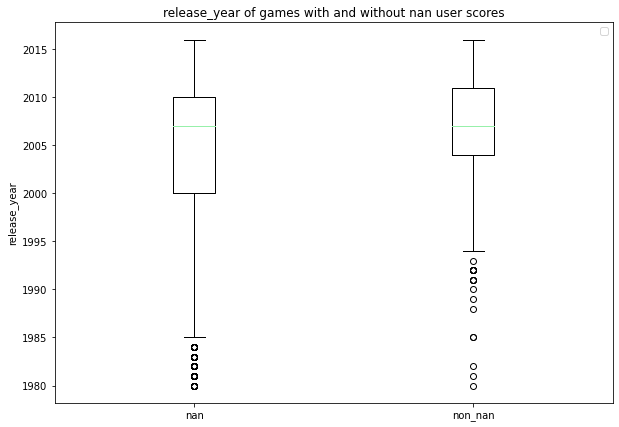

In [35]:
#checking distribution
plt.clf()

plt.figure(figsize=(10,7))

plt.boxplot([nan_years, non_nan_years], labels = ('nan', 'non_nan'))
plt.ylabel('release_year')
plt.title('release_year of games with and without nan user scores')



plt.legend(loc='upper right')

We rejected the null hypothesis. There does appear to be a significant difference in release year of games with and without user and critic scores. We can see these are typically older games.

It's also possible that games withlower sales are the ones lacking user scores and critic scores.
We can do a similar t-test for na_sales figures.


H0: There is no difference in the average sales of games missing user scores and those not missing user scores

H1: There is a difference in the average sales of games missing user scores and those not missing user scores

In [36]:
nan_sales = df[df['user_score'].isnull()]['na_sales']
non_nan_sales = df[df['user_score'].notnull()]['na_sales']

alpha = 0.05

results = st.ttest_ind(nan_sales, non_nan_sales, equal_var = True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    


p-value: 5.270997716360041e-36
We reject the null hypothesis


In [37]:
print(nan_sales.mean())
print(non_nan_sales.mean())

0.1735264693622343
0.33348276230120605


So, we see that games that still have NaN `user_scores` and `critic_scores` are disproportionately older games with lower NA sales figures, these are not Missing At Random.

At this point we have filled imputed as many scores as reasonably possible. 
If we remove all rows with NaN values we will lost ~40% of our data. Which would cause our data to skew towards newer games with higher sales figures.

As we want to consider what might cause a game to not succeed, we will leave in NaN values for now and remove them when we specifically  look at review scores.


#### `rating`

There were a number of missing values in this column.

We can at first try filling in missing ratings with the ratings of the same game on other platforms.


We might also expect games of the same genre to have very similar ESRB ratings, we can replace the remaining missing values with the modal rating of other games of that genre.

In [38]:
#checking details
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [39]:
#converting rating to ordered categorical
df.rating = pd.Categorical(df.rating, 
                      categories=["EC", "E", "K-A", "E10+", "T", "M", "AO", "RP"],
                      ordered=True)

In [40]:
len(df[df['rating'].isnull()])

6699

In [41]:
#replacing missing ratings with other ratings for the same game
for name in df[df['rating'].isnull()]['name'].unique():
    try:
        mode = df[df['name'] == name]['rating'].mode()[0]
        #print(mode)
        
        df.loc[(df['name'] == name) & (df['rating'].isnull()), 'rating'] = mode
    except:
        pass
    
len(df[df['rating'].isnull()])

6262

In [42]:
#checking modal ratings
modal_ratings = df.pivot_table(index = 'genre', values = 'rating', aggfunc = pd.Series.mode)
modal_ratings

,rating
genre,
Action,T
Adventure,E
Fighting,T
Misc,E
Platform,E
Puzzle,E
Racing,E
Role-Playing,T
Shooter,M


In [43]:
# replacing missing ratings with the modal rating for that genre
for genre in df['genre'].unique():
    r = modal_ratings.loc[genre].item()
    df.loc[(df['rating'].isnull()) & (df['genre'] == genre), 'rating'] = r
    
len(df[df['rating'].isnull()])

0

#### Enriching data

In order to help with future analysis we can take the sum of the sales column to create a new column - `total_sales`

##### `total_sales`

In [44]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Data analysis

There are a number of different things to investigate that will allow us to narrow down the data we use to make predictions about the future.

- Games released per year

- Sales per platform

- Relevant years

- Potentially profitable platforms

- Recent sales per platform

- Effect of user and critic reviews

- Distribution of games and sales by genre

#### Games per year


If we are to make predictions for future years, we need to decide what data is relevant to us.

We'll start of by look at the distribution of games released per year

In [45]:
#creating pivot table
games_per_year = df.pivot_table(index = 'release_year', values = 'rating', aggfunc = 'count')

games_per_year


,rating
release_year,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<Figure size 432x288 with 0 Axes>

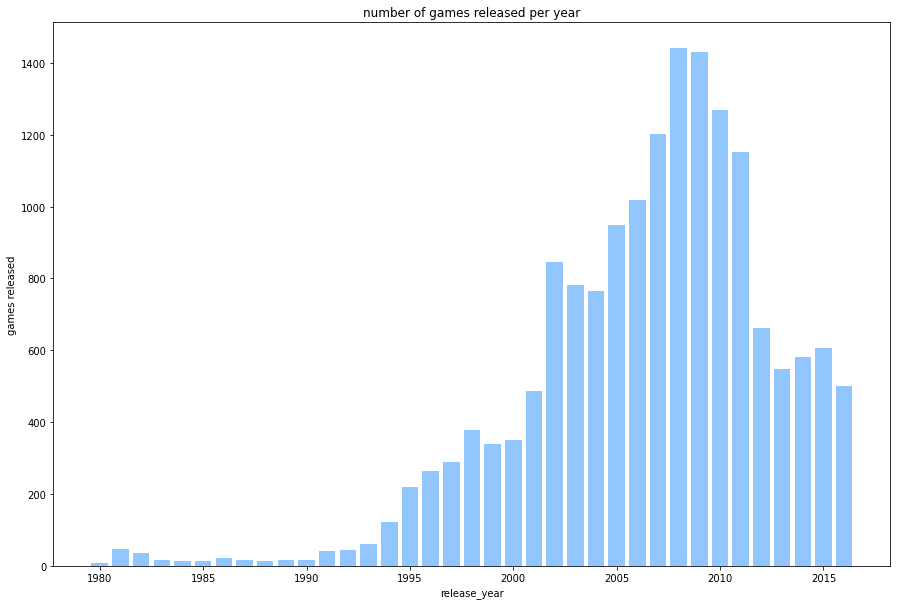

In [46]:
#plotting bar chart aof sales per year
plt.clf()
plt.figure(figsize=(15,10))
plt.bar(x= games_per_year.index, height = games_per_year['rating'])

plt.xlabel('release_year')
plt.ylabel('games released')
plt.title('number of games released per year')
plt.show()

There is a clear peak in 2008/2009.

It's possible the peak in 2008 and 2009 could be due to games being released on a larger number of different platforms in those years than they are 2016. We can investigate this further by looking at the number of unique releases.

In [47]:
#looking at only unique releases
temp_df = df.drop_duplicates(subset='name', keep="first")
unique_games_per_year = temp_df.pivot_table(index = 'release_year', values = 'rating', aggfunc = 'count')

unique_games_per_year

,rating
release_year,
1980,8
1981,43
1982,33
1983,16
1984,13
1985,13
1986,21
1987,15
1988,11


Text(0.5, 1.0, 'unique number of games released per year')

<Figure size 432x288 with 0 Axes>

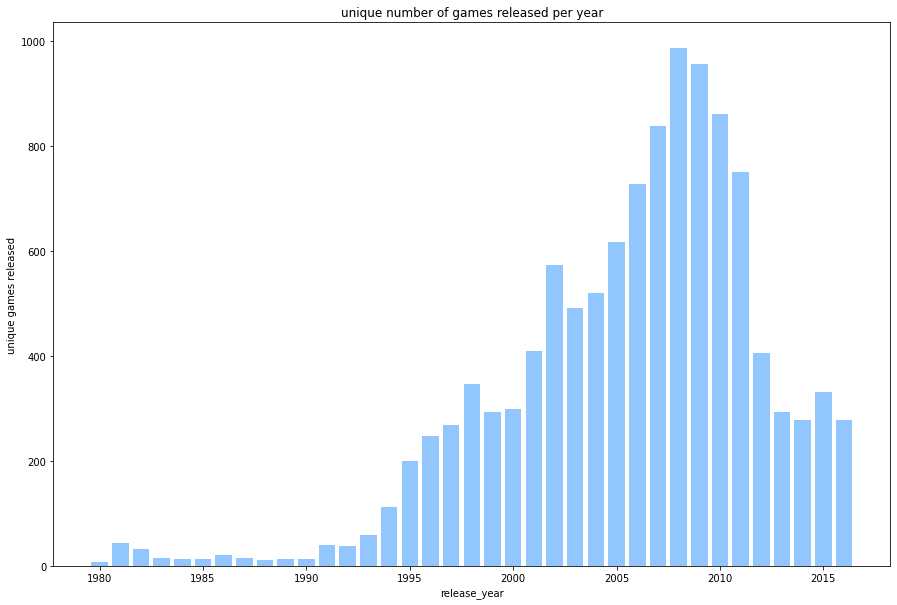

In [48]:
plt.clf()
plt.figure(figsize=(15,10))
plt.bar(x= unique_games_per_year.index, height = unique_games_per_year['rating'])

plt.xlabel('release_year')
plt.ylabel('unique games released')
plt.title('unique number of games released per year')

There is still a similar distribution. There were more games being released in 2008/2009 but the number of games released has been reasonably consistent since 2013.

#### Sales per platform

We can identify which platforms had the greatest number of total sales and the distribution of sales per year.

This will allow us to identify platforms that were once popular yet have since died out, which will inform us as to how long it typically takes a platform to appear and old ones to fade.

In [49]:
#creating pivot table
sales_per_platform = df.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc = 'sum')
sales_per_platform = sales_per_platform.sort_values('total_sales')
sales_per_platform

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
PCFX,0.00,0.03,0.00,0.00,0.03
GG,0.00,0.04,0.00,0.00,0.04
3DO,0.00,0.10,0.00,0.00,0.10
TG16,0.00,0.16,0.00,0.00,0.16
WS,0.00,1.42,0.00,0.00,1.42
NG,0.00,1.44,0.00,0.00,1.44
SCD,0.36,0.45,1.00,0.05,1.86
DC,1.69,8.56,5.43,0.27,15.95
GEN,5.52,2.67,19.27,0.89,28.35


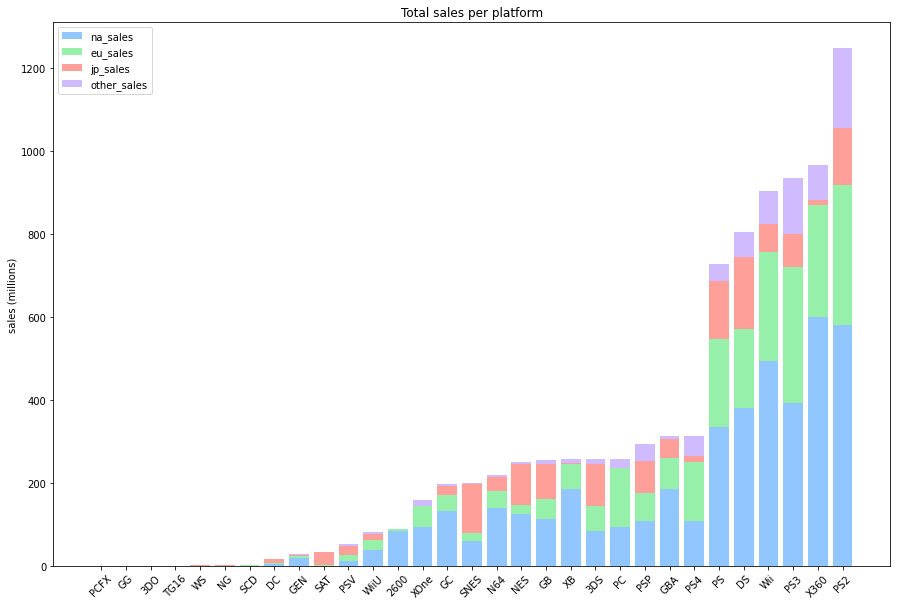

In [50]:
#creating stacked bar chart of total sales
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(sales_per_platform.index, sales_per_platform['na_sales'], label='na_sales')
ax.bar(sales_per_platform.index, sales_per_platform['eu_sales'], bottom =  sales_per_platform['na_sales'], label='eu_sales')
ax.bar(sales_per_platform.index, sales_per_platform['jp_sales'], bottom =  sales_per_platform['eu_sales']+sales_per_platform['na_sales'], label='jp_sales')
ax.bar(sales_per_platform.index, sales_per_platform['other_sales'], bottom =  sales_per_platform['eu_sales']+sales_per_platform['na_sales']+sales_per_platform['jp_sales'], label='other_sales')

plt.xticks(rotation = 45)
ax.set_ylabel('sales (millions)')
ax.set_title('Total sales per platform')
ax.legend()

The PS2 has clearly, historically had the most sales and there are a few systems which have had very few sales.

Let's take a closer look at the 4 most most popular platforms and how their sales varied from first release to dying out.

<Figure size 432x288 with 0 Axes>

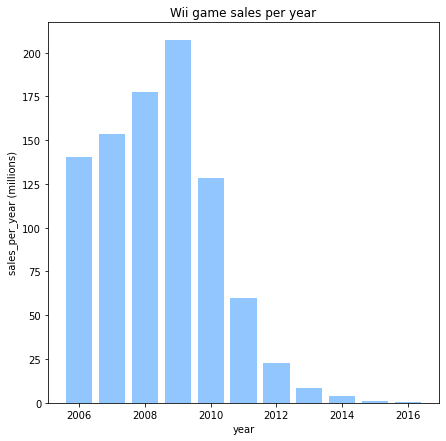

<Figure size 432x288 with 0 Axes>

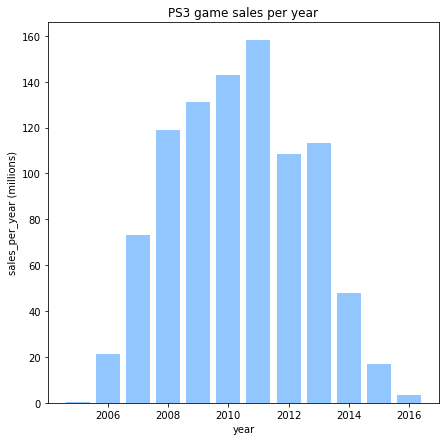

<Figure size 432x288 with 0 Axes>

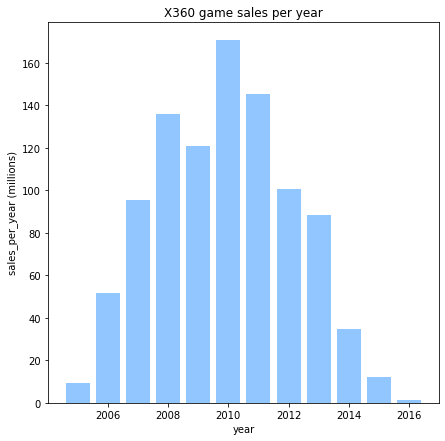

<Figure size 432x288 with 0 Axes>

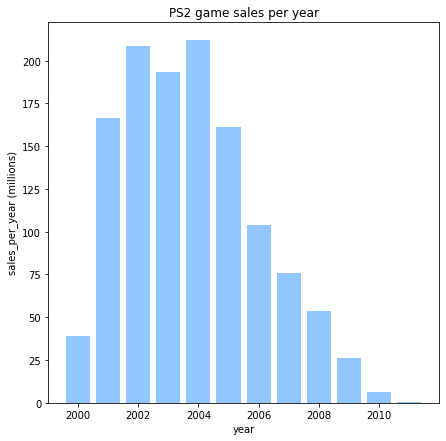

In [51]:
# producing bar chart showing sales per year for different platforms
for platform in sales_per_platform.tail(4).index:
   
    temp_df = df[df['platform'] == platform]
    total_sales_per_year = temp_df.pivot_table(index = 'release_year', values = 'total_sales', aggfunc = 'sum')

    plt.clf()
    plt.figure(figsize=(7,7))
    plt.bar(x= total_sales_per_year.index, height = total_sales_per_year['total_sales'])

    plt.xlabel('year')
    plt.ylabel('sales_per_year (millions)')
    plt.title(f'{platform} game sales per year')
    plt.show()

We can see a somewhat similar pattern for each of these systems:
- a lifecycle of ~10years from release to dying out
- a peak in sales after about 5 years

This is important to consider when we are deciding what platforms will be profitable in the future.

#### Relevant years

When deciding what data to use for future predictions, we need to consider what years are relevant. We've seen some data for the top 4 platforms, we can check if our 10 year lifetime hypothesis holds for other platforms

In [52]:
#checking the earliest and latest reease date for each platform
years = df.pivot_table(index = 'platform', values = 'release_year', aggfunc = ['min', 'max'])
years['lifetime'] = years['max']['release_year'] - years['min']['release_year']
years

,min,max,lifetime
,release_year,release_year,
platform,,,
2600,1980,1994,14
3DO,1994,1995,1
3DS,2000,2016,16
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6


DS date seems erroneous, we can correct it.

In [53]:
df[(df['release_year'] == 1985) & (df['platform'] == 'DS')]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,T,0.02


In [54]:
df.drop(index = 15957, inplace = True)
df[(df['release_year'] == 1985) & (df['platform'] == 'DS')]

,name,platform,release_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


In [55]:
years = df.pivot_table(index = 'platform', values = 'release_year', aggfunc = ['min', 'max'])
years['lifetime'] = years['max']['release_year'] - years['min']['release_year']
years

,min,max,lifetime
,release_year,release_year,
platform,,,
2600,1980,1994,14
3DO,1994,1995,1
3DS,2000,2016,16
DC,1998,2008,10
DS,2004,2013,9
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6


<Figure size 432x288 with 0 Axes>

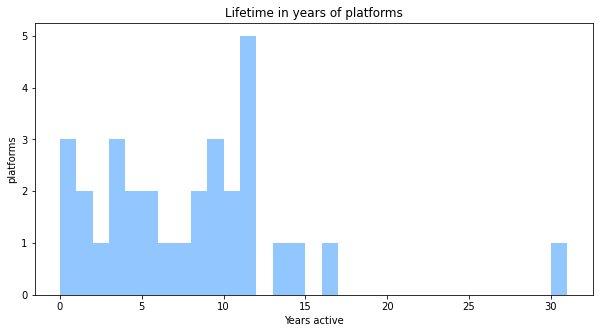

7.612903225806452
6.221882991264722


In [56]:
#creating a histogram of lifetimes
plt.clf()
plt.figure(figsize = (10,5))
plt.hist(years['lifetime'], bins = max(years['lifetime']))
plt.xlabel('Years active')
plt.ylabel('platforms')
plt.title('Lifetime in years of platforms')
plt.show()
plt.show()

print(years['lifetime'].mean())
print(years['lifetime'].var()**0.5)

We can see the mean number of years a platform lasts is ~7.6 years but there are some that manage to last significantly longer.

The PC has had releases every year since 1985 and is somewhat unique amongst platforms, that it is not one unchanging pice of hardware but one that evolves as hardware is improved.

Based on the lifecycle of platforms, let's look a data since the release of current gen consoles; since 2013.

In [57]:
#finding platforms that have releases since 2013
df = df[df['release_year'] >= 2013]
alive_platforms = df[df['release_year'] == 2016]['platform'].unique()
print(alive_platforms)

['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'PC' 'X360' 'PSV' 'Wii']


In [58]:
#slicing dataframe to only releases on platforms that have had releases since 2013
df = df.loc[df['platform'].isin(alive_platforms)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          2161 non-null   object  
 1   platform      2161 non-null   object  
 2   release_year  2161 non-null   int64   
 3   genre         2161 non-null   object  
 4   na_sales      2161 non-null   float64 
 5   eu_sales      2161 non-null   float64 
 6   jp_sales      2161 non-null   float64 
 7   other_sales   2161 non-null   float64 
 8   critic_score  1370 non-null   float64 
 9   user_score    1370 non-null   float64 
 10  rating        2161 non-null   category
 11  total_sales   2161 non-null   float64 
dtypes: category(1), float64(7), int64(1), object(3)
memory usage: 205.1+ KB


#### Potentially profitable platforms

Previously we noted that platforms tend to have a lifecycle of 10 years or less and tend to peak in sales around 5 years after release before sales fall again.

We can check which platforms have seen their sales fall for 3 consecutive years and therefore might not be profitable in the coming years.

In [59]:
#sales per year per platform
for platform in alive_platforms:
    print(platform)
    temp_df = df[df['platform'] == platform]
    sales = temp_df.pivot_table(index = 'release_year', values = 'total_sales', aggfunc = 'sum')
    print(sales)
    print("""
    
    """)

PS4
              total_sales
release_year             
2013                25.99
2014               100.00
2015               118.90
2016                69.25

    
    
3DS
              total_sales
release_year             
2013                56.57
2014                43.76
2015                27.78
2016                15.14

    
    
XOne
              total_sales
release_year             
2013                18.96
2014                54.07
2015                60.14
2016                26.15

    
    
WiiU
              total_sales
release_year             
2013                21.65
2014                22.03
2015                16.35
2016                 4.60

    
    
PS3
              total_sales
release_year             
2013               113.25
2014                47.76
2015                16.82
2016                 3.60

    
    
PC
              total_sales
release_year             
2013                13.01
2014                13.28
2015                 8.52
2016      

In [60]:
#finding platforms whose sales have fallen 3 consecutive times.
for platform in alive_platforms:
    temp_df = df[df['platform'] == platform]
    total_sales_per_year = temp_df.pivot_table(index = 'release_year', values = 'total_sales', aggfunc = 'sum')
    if total_sales_per_year.loc[2016]['total_sales'] < total_sales_per_year.loc[2015]['total_sales'] < total_sales_per_year.loc[2014]['total_sales'] < total_sales_per_year.loc[2013]['total_sales']:
        print(platform)

3DS
PS3
X360
Wii


The 3DS, PS3, X360 and Wii have all seen sales fall for 3 consecutive years and we'd expect that pattern to continue.

#### Recent sales per platform

We can build boxplots to compare global sales of games broken down by platform then check if these difference in average sales are significant using a t-test.



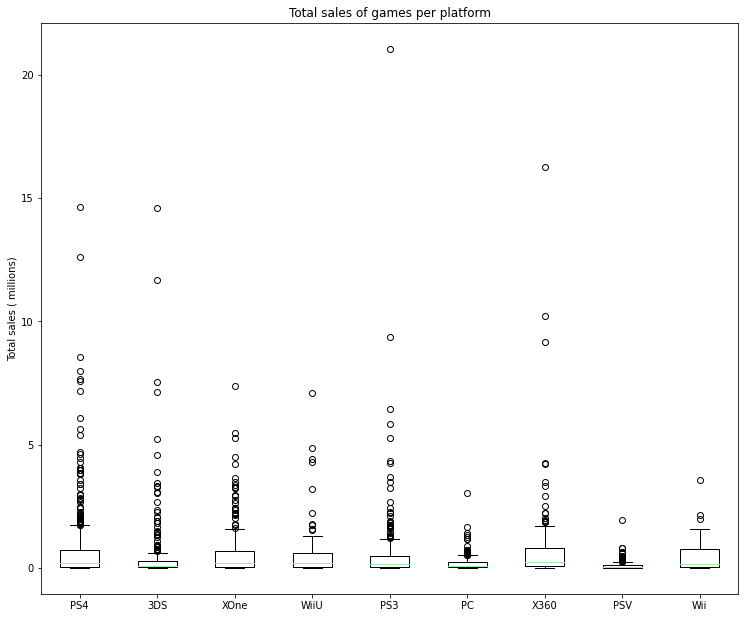

In [61]:
#building box plot per platform
sales = {}

for platform in alive_platforms:
    temp_df = df[df['platform'] == platform]
    sales[platform] = list(temp_df['total_sales'])
#print(sales)    
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 10.5)
plt.title('Total sales of games per platform')
plt.ylabel('Total sales ( millions)')
ax.boxplot(sales.values())
ax.set_xticklabels(sales.keys())

#plt.boxplot(sales)
plt.show()


Well, the plot is dominated by the outliers, lets take a closer look at the boxes themselves.

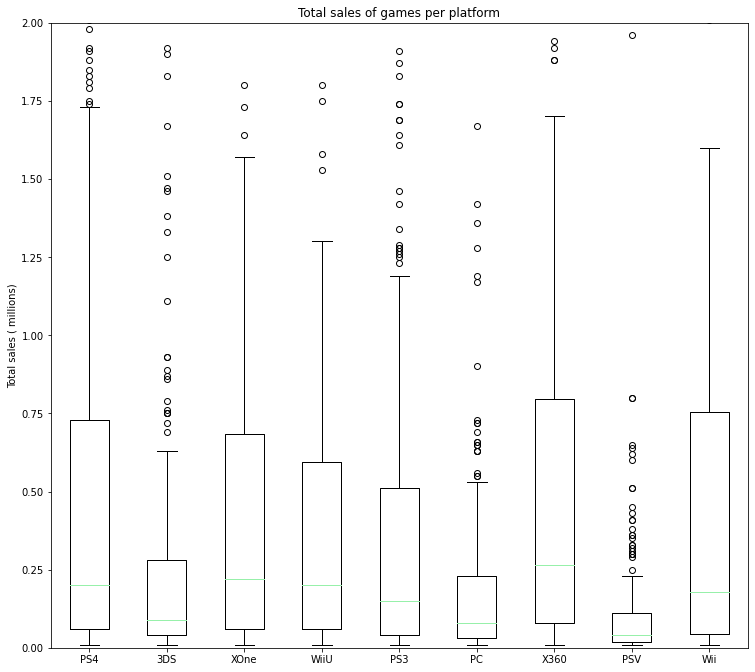

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(12.5, 11.5)
ax.boxplot(sales.values())
ax.set_xticklabels(sales.keys())
plt.ylim(0,2)
plt.title('Total sales of games per platform')
plt.ylabel('Total sales ( millions)')
#plt.boxplot(sales)
plt.show()

We can see a number of plaforms have quite similar median sales per game, although the PC, 3DS and PSV appear to have much lower average sales.

We can check if the difference in average sales is significant by forming all the pairwise relationships then performing a t-test between each pair.

In [63]:
#getting pairwise combinations
pairs = list(itertools.combinations(sales.keys(), 2))
alpha = 0.05
significant = []
not_significant = []
for pair in pairs:
    a = pair[0]
    b = pair[1]
    #testing independence
    results = st.ttest_ind(sales[a], sales[b], equal_var = False)
    
    if (results.pvalue < alpha):
        significance = ' significant'
        significant.append(pair)
    else:
        significance = ' not significant'
        not_significant.append(pair)
    
    #print(f' {a} , {b} : the difference in sales is {significance}')
print('Pairs with significant differences in average sales:')
for s in significant:
    print(s)
print("""

""")

print('Pairs with non-significant differences in average sales:')
for s in not_significant:
    print(s)

Pairs with significant differences in average sales:
('PS4', '3DS')
('PS4', 'PS3')
('PS4', 'PC')
('PS4', 'PSV')
('3DS', 'PC')
('3DS', 'PSV')
('XOne', 'PC')
('XOne', 'PSV')
('WiiU', 'PC')
('WiiU', 'PSV')
('PS3', 'PC')
('PS3', 'PSV')
('PC', 'X360')
('PC', 'PSV')
('X360', 'PSV')
('PSV', 'Wii')



Pairs with non-significant differences in average sales:
('PS4', 'XOne')
('PS4', 'WiiU')
('PS4', 'X360')
('PS4', 'Wii')
('3DS', 'XOne')
('3DS', 'WiiU')
('3DS', 'PS3')
('3DS', 'X360')
('3DS', 'Wii')
('XOne', 'WiiU')
('XOne', 'PS3')
('XOne', 'X360')
('XOne', 'Wii')
('WiiU', 'PS3')
('WiiU', 'X360')
('WiiU', 'Wii')
('PS3', 'X360')
('PS3', 'Wii')
('PC', 'Wii')
('X360', 'Wii')


We can see that many of the pairs with non-significant differences are those that have simliar markets. i.e the 'home entertainment system', e.g PS4 vs XOne.


The PC continues to be an outlier, it's average sales are significantly different to all but one other platforms.


#### Effect of user and critic reviews

Let's take a closer look at the platform with the most sales in 2016, the PS4 and how user scores and critic scores correlate with total sales.


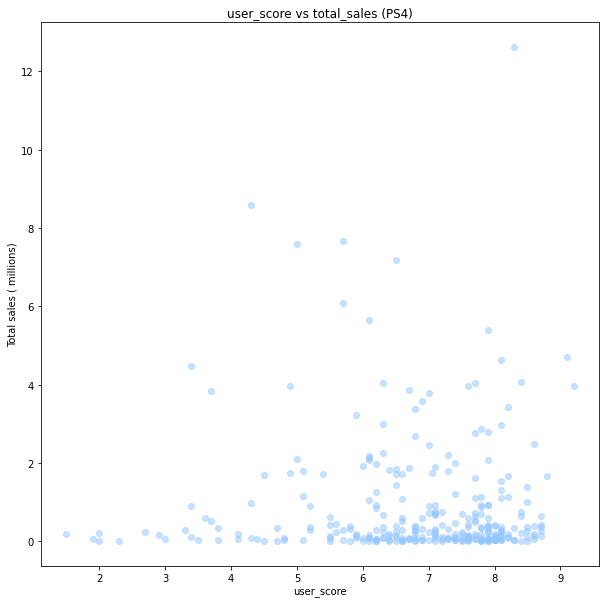

In [64]:
#looking at PS4 user scores, critic scores and sales
temp_df = df[df['platform'] == 'PS4']
plt.figure(figsize = (10,10))
plt.scatter(temp_df['user_score'], temp_df['total_sales'], alpha = 0.5)
plt.title('user_score vs total_sales (PS4)')
plt.xlabel('user_score')
plt.ylabel('Total sales ( millions)')

plt.show()

<Figure size 432x288 with 0 Axes>

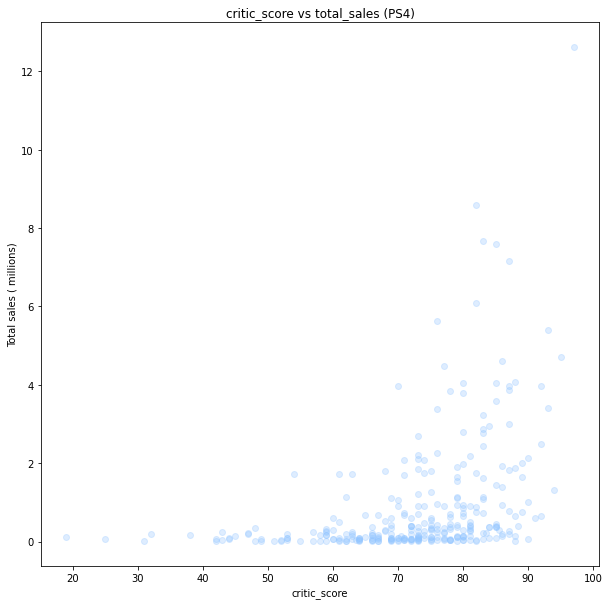

In [65]:
plt.clf()
plt.figure(figsize = (10,10))
plt.scatter(temp_df['critic_score'], temp_df['total_sales'], alpha = 0.3)
plt.title('critic_score vs total_sales (PS4)')
plt.xlabel('critic_score')
plt.ylabel('Total sales ( millions)')

plt.show()

In [66]:
temp_df = df[(df['platform'] == 'PS4') & (df['user_score'].notnull())][['user_score', 'critic_score', 'total_sales']]
temp_df.corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.577972,-0.021684
critic_score,0.577972,1.000000,0.391369
total_sales,-0.021684,0.391369,1.000000


Interestingly we can see that user score has almost no correlation with total sales but critic score is weakly positively correlated with total sales.

Let's see if that us the case for other platforms.

In [67]:
#checking correllation for each platform
for platform in alive_platforms:
    temp_df = temp_df = df[(df['platform'] == platform) & (df['user_score'].notnull())][['user_score', 'critic_score', 'total_sales']]
    corr = temp_df.corr()
    u = corr['user_score']['total_sales']
    c = corr['critic_score']['total_sales']
    
    print(platform)
    print('user_score vs total_sales, r-value: ', u)
    print('critic_score vs total_sales, r-value: ', c)

PS4
user_score vs total_sales, r-value:  -0.02168357645843344
critic_score vs total_sales, r-value:  0.39136892960174546
3DS
user_score vs total_sales, r-value:  0.29156082466809835
critic_score vs total_sales, r-value:  0.3478850256330049
XOne
user_score vs total_sales, r-value:  -0.09723977003441377
critic_score vs total_sales, r-value:  0.37441772680325697
WiiU
user_score vs total_sales, r-value:  0.39817531133968337
critic_score vs total_sales, r-value:  0.38707481843437785
PS3
user_score vs total_sales, r-value:  0.012911559143088565
critic_score vs total_sales, r-value:  0.29945626585051666
PC
user_score vs total_sales, r-value:  -0.10296272814919194
critic_score vs total_sales, r-value:  0.2052276154591298
X360
user_score vs total_sales, r-value:  -0.006502034304921995
critic_score vs total_sales, r-value:  0.2999376535199562
PSV
user_score vs total_sales, r-value:  0.06424516124001761
critic_score vs total_sales, r-value:  0.26521552607488275
Wii
user_score vs total_sales, r-va

We can see that for all platforms except the WiiU, total sales are more highly correlated with critic scores than user scores.
For most platforms critic scores are weakly, positively correlated with total sales but have little to no correlation with user scores.

#### Distribution of games and sales by genre

Let's look at what might be the most profitable genres, looking at the total amount of games released per platform and their total sales.

Text(0.5, 1.0, 'Number of games per platform')

<Figure size 432x288 with 0 Axes>

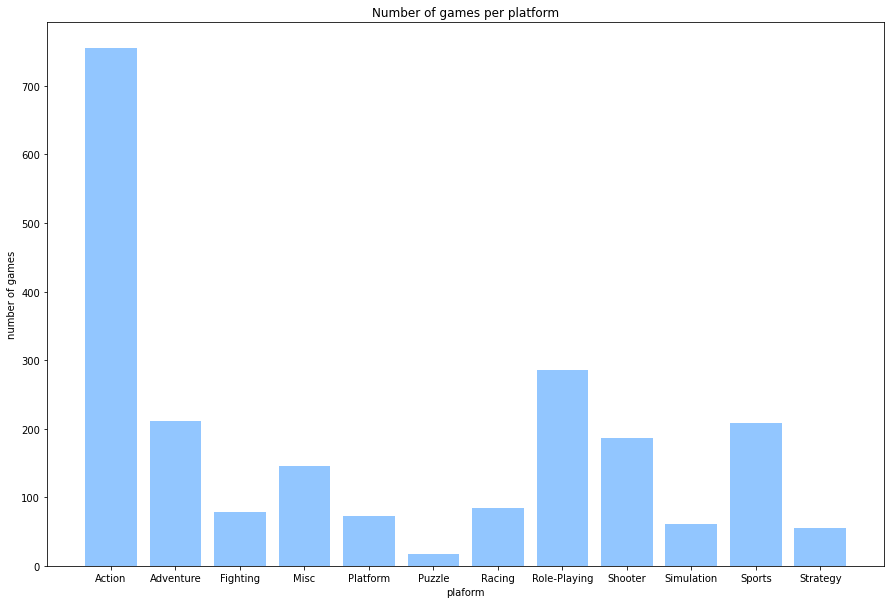

In [68]:
#creating bar plot of number of games per platform
by_genre = df.pivot_table(index = 'genre', values = 'name', aggfunc = 'count')

plt.clf()
plt.figure(figsize=(15,10))

plt.bar(x= by_genre.index, height = by_genre['name'])

plt.xlabel('plaform')
plt.ylabel('number of games')
plt.title('Number of games per platform')

Text(0.5, 1.0, 'total_sales per platform')

<Figure size 432x288 with 0 Axes>

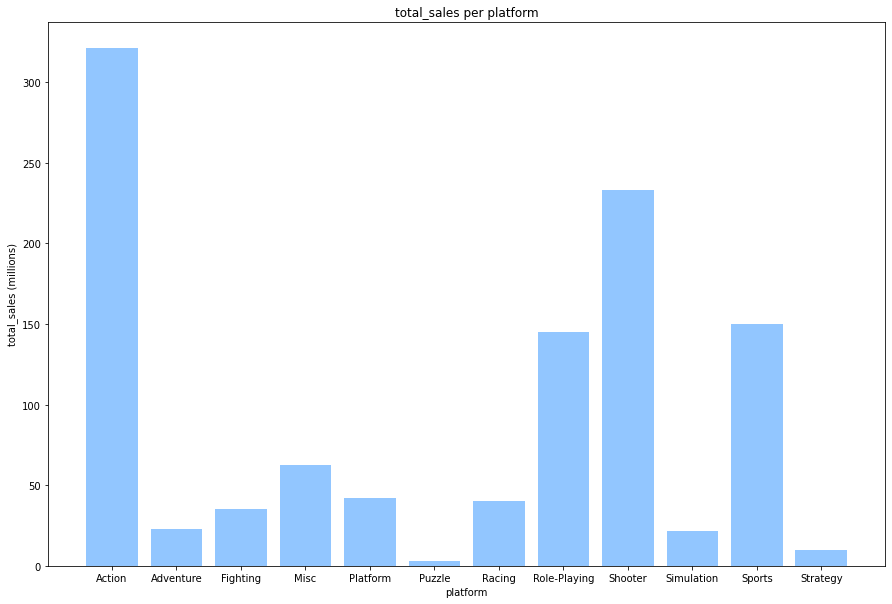

In [69]:
#creating bar plot of number of sales per genre
sales_by_genre = df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')

plt.clf()
plt.figure(figsize=(15,10))

plt.bar(x= sales_by_genre.index, height = sales_by_genre['total_sales'])

plt.xlabel('platform')
plt.ylabel('total_sales (millions)')
plt.title('total_sales per platform')

We can see that games in the Action genre have the most releases and most sales but it might be more useful to plot the total games per genre vs total sales per genre.

<Figure size 432x288 with 0 Axes>

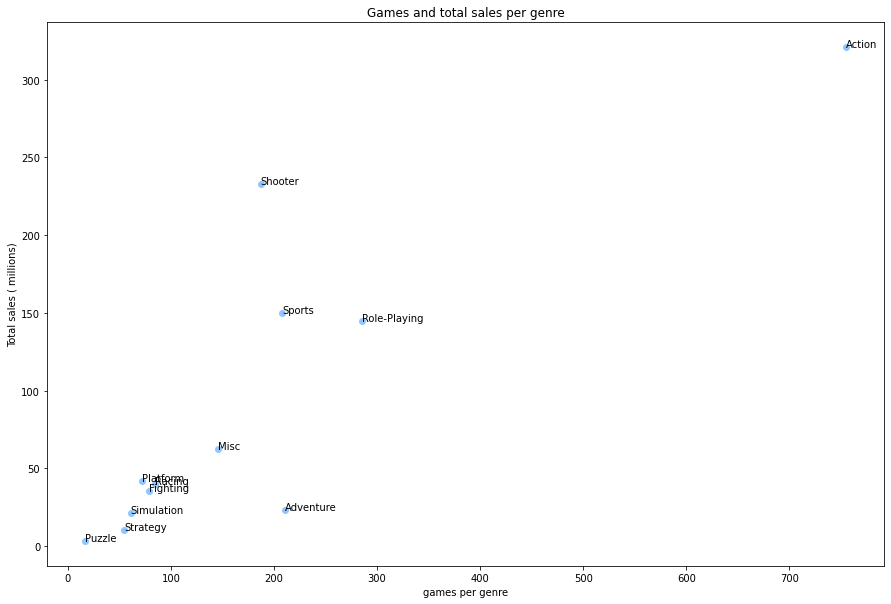

In [70]:
#plotting games vs total sales
plt.clf()
plt.figure(figsize = (15,10))
plt.scatter(by_genre['name'], sales_by_genre['total_sales'])
plt.title('Games and total sales per genre')
plt.xlabel('games per genre')
plt.ylabel('Total sales ( millions)')

for i, label in enumerate(by_genre.index):
    plt.annotate(label, (by_genre['name'][i], sales_by_genre['total_sales'][i]))

plt.show()

We can see that whilst Action games have the most games and the most sales, the Shooter genre seems to have higher sales per game than any other genre, whilst Adventure games typically have lower sales per game.

### User profile for each region

To get a clearer idea of users in each region we can build a user profile, looking at the top platforms and genres in each region.

We'll also investigate wether ESRB ratings effect sales in individual regions.


#### Top platforms per region

In [71]:
#creating df of sales per platform in different regions
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

platform_df = df.pivot_table(index = 'platform', values = regions, aggfunc = 'sum')
platform_df    

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,30.96,67.81,38.20,6.28
PC,25.84,0.00,11.19,3.03
PS3,67.81,23.35,63.50,26.77
PS4,141.09,15.96,108.74,48.35
PSV,6.10,18.59,5.04,3.26
Wii,5.93,0.05,6.56,1.12
WiiU,19.85,10.88,29.21,4.69
X360,42.52,0.51,81.66,12.11
XOne,51.59,0.34,93.12,14.27


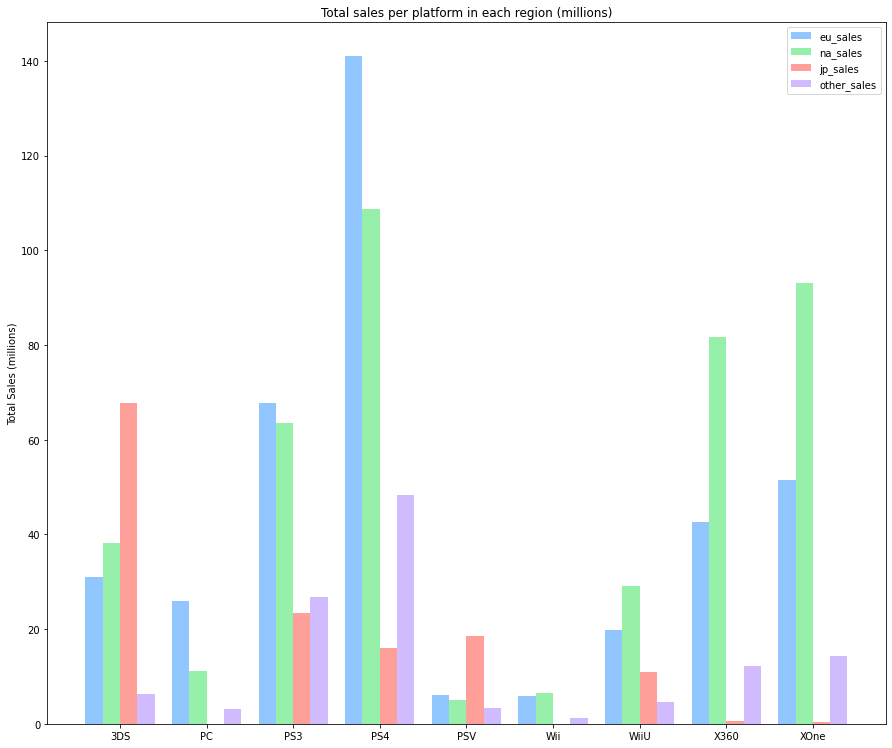

In [72]:
#creating grouped bar chart
labels = list(platform_df.index)
eu_sales  = platform_df['eu_sales']
na_sales  = platform_df['na_sales']
jp_sales  = platform_df['jp_sales']
other_sales  = platform_df['other_sales']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig.set_size_inches(12.5, 10.5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, eu_sales, width, label='eu_sales')
rects2 = ax.bar(x - width*0.5, na_sales, width, label='na_sales')
rects3 = ax.bar(x + width*0.5, jp_sales, width, label='jp_sales')
rects4 = ax.bar(x + width*1.5, other_sales, width, label='other_sales')

fig.set_size_inches(12.5, 10.5)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Sales (millions)')
ax.set_title('Total sales per platform in each region (millions)')
plt.xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

Some observations:

- 3DS and PSV (the only handheld consoles in our dataset) are the only platforms with higher game sales in JP than other regions

- Microsoft's X360 and XOne are much more favoured in the NA and EU than in JP. Sony's platforms are much more popular in JP.


To make comparisons easier, we can create pie charts for each region showing the proportion of sales each platform has since 2006.

In [73]:
#assigning colors to platform to maintain consistency
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#adding more unique colors
n_colors = ['#957DAD', '#FFDFD3', '#F4F4F4']
for c in n_colors:
    colors.append(c)

# creating color mapping function+    
def c_map(ndf):
    cdict = {}
    l = len(colors)
    i = 0
    for n in ndf.index:
        cdict[n] = colors[i%l]
        i+=1
    return cdict     


In [74]:
#creating a pie chart function
def pie_chart(region, ndf):
    ndf = ndf.sort_values(region)
    labels = list(ndf.index)
    plt.figure(figsize = (5, 5))
    clr = [cdict[v] for v in labels]
    plt.pie(ndf[region], startangle=90, wedgeprops = {"edgecolor" : "black", 'linewidth': 1, 'antialiased': True}, labels=labels, colors = clr, rotatelabels = True)
    plt.title(f' distribution of {region} per {ndf.index.name}', pad = 40)
    plt.show()

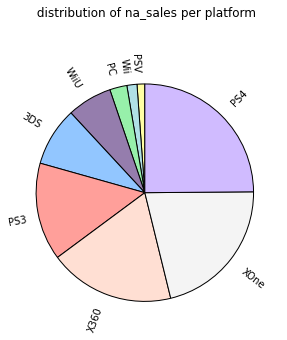

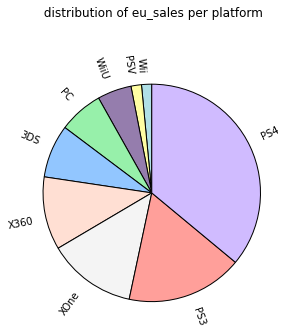

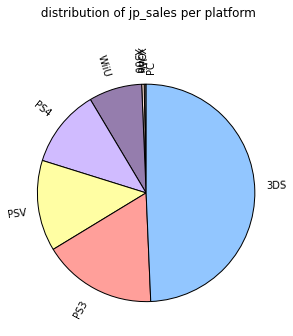

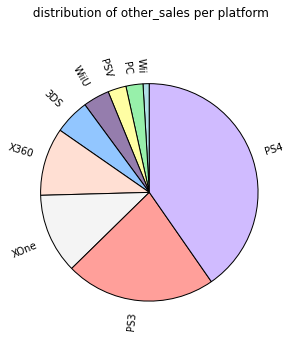

In [75]:
cdict = c_map(platform_df)

for region in regions:
    pie_chart(region, platform_df)

The EU and NA have somewhat similar proportions, the main differences being that PC games are more popular in the EU and that in the EU, a higher proportion of sales are on Playstation consoles, whilst NA prefers Xbox consoles.

The sales in Japan are completely dominated by Nintendo and Sony platforms.


'Other' sales have a similar distribution to EU sales.

#### Top genres per region

Lets look at the top 5 genres per region

In [76]:
#creating df of sales per genre per region
genre_df = df.pivot_table(index = 'genre', values = regions, aggfunc = 'sum')
genre_df    

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,118.35,39.65,125.91,37.23
Adventure,8.22,5.11,7.14,2.43
Fighting,8.55,7.63,15.55,3.56
Misc,20.00,9.03,27.46,6.08
Platform,15.15,4.79,17.93,4.07
Puzzle,1.00,1.18,0.83,0.16
Racing,20.19,2.30,12.96,4.44
Role-Playing,36.97,50.01,46.40,11.48
Shooter,87.86,6.61,109.74,28.77


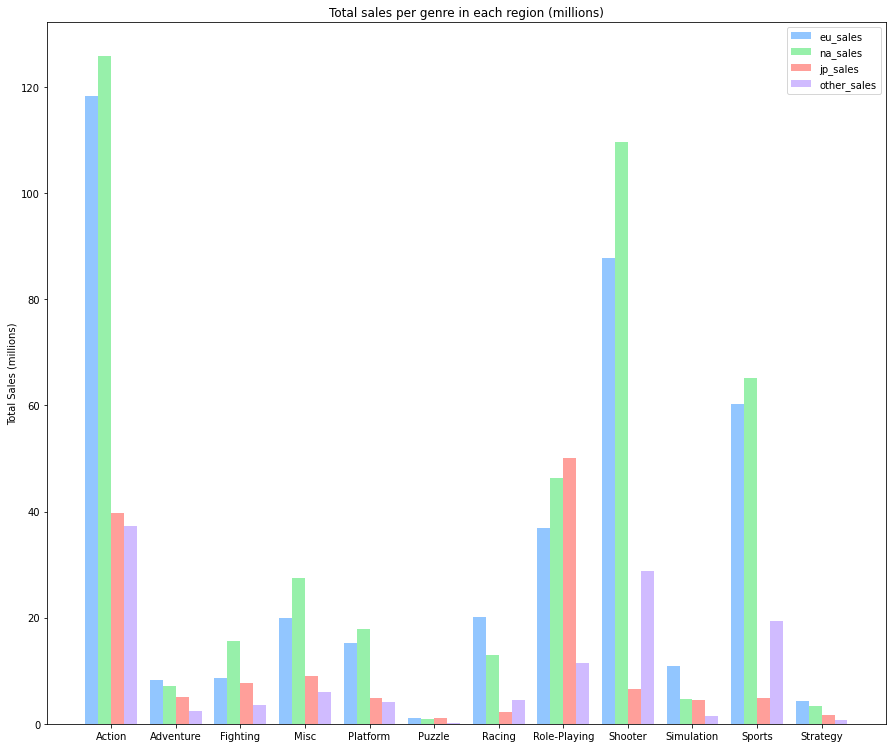

In [77]:
#creating grouped bar graph
labels = list(genre_df.index)
eu_sales  = genre_df['eu_sales']
na_sales  = genre_df['na_sales']
jp_sales  = genre_df['jp_sales']
other_sales = genre_df['other_sales']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig.set_size_inches(12.5, 10.5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, eu_sales, width, label='eu_sales')
rects2 = ax.bar(x - width*0.5, na_sales, width, label='na_sales')
rects3 = ax.bar(x + width*0.5, jp_sales, width, label='jp_sales')
rects4 = ax.bar(x + width*1.5, other_sales, width, label='other_sales')

fig.set_size_inches(12.5, 10.5)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Sales (millions)')
ax.set_title('Total sales per genre in each region (millions)')
plt.xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

Initially we can observe that in all regions apart from JP, Action is the top selling genre, in JP it is Role-Playing.

Lets take a closer look at the breakdown of sales per genre per region.

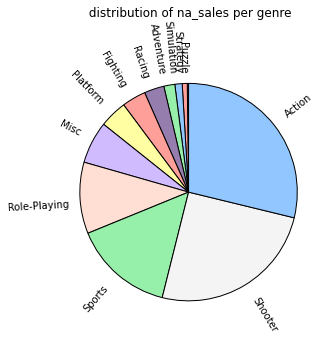

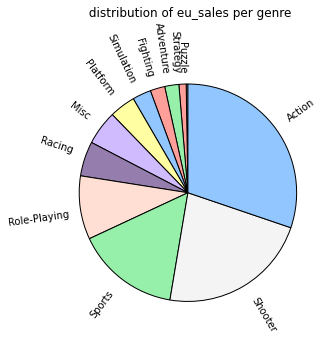

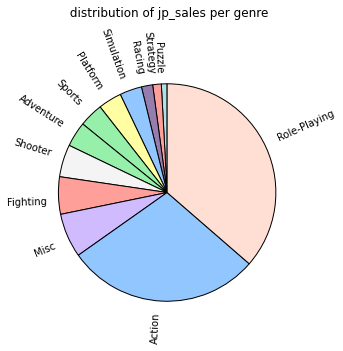

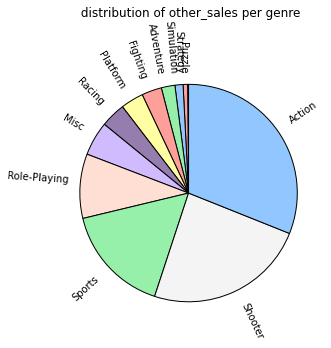

In [78]:
cdict = c_map(genre_df)
for region in regions:
    pie_chart(region, genre_df)

We can see that in all regions Action games make up between a quarter and a third of sales. NA, EU and 'other all have quite similar proportions of genres making up total sales. JP is quite different, with Role-Playing making up ~25% of sales and Shooter sales being much lower in JP.

#### Sales per ESRB rating in different regions

Lets see if ESRB ratings affect sales in individual regions?

In [79]:
rating_df = df.pivot_table(index = 'rating', values = regions, aggfunc = 'sum')
rating_df    

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
EC,0.00,0.00,0.00,0.00
E,106.73,32.04,102.63,28.85
K-A,0.00,0.00,0.00,0.00
E10+,45.04,6.27,56.16,13.18
T,66.55,83.50,84.16,21.48
M,173.37,15.68,194.27,56.37
AO,0.00,0.00,0.00,0.00
RP,0.00,0.00,0.00,0.00


In [80]:
#dropping rows with no sales
rating_df.drop(['AO', 'K-A', 'EC', 'RP'], axis = 0, inplace = True)

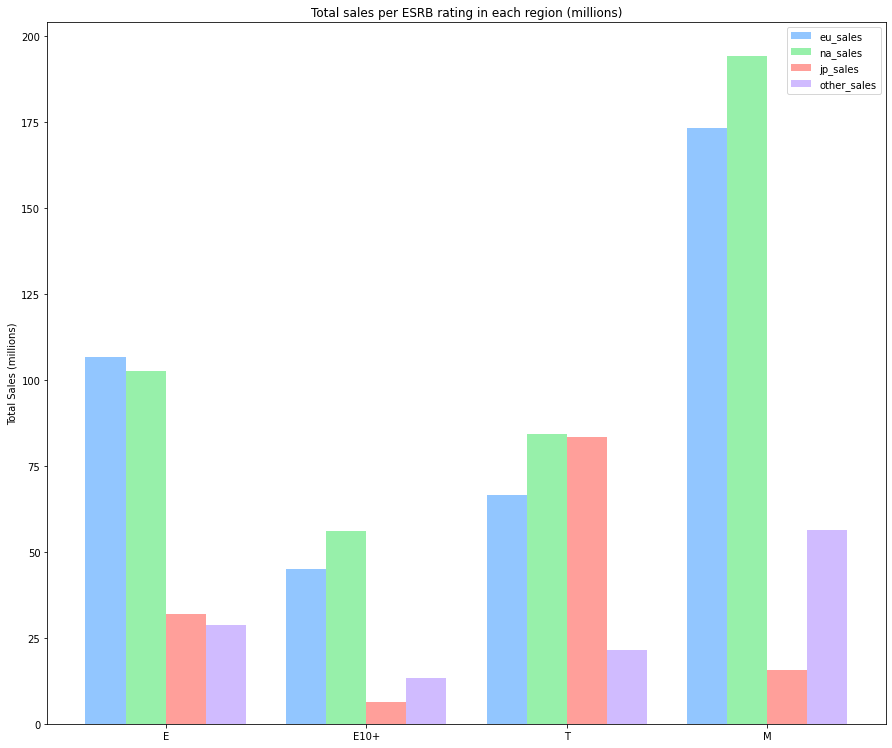

In [81]:
labels = list(rating_df.index)
eu_sales  = rating_df['eu_sales']
na_sales  = rating_df['na_sales']
jp_sales  = rating_df['jp_sales']
other_sales = rating_df['other_sales']

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
fig.set_size_inches(12.5, 10.5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, eu_sales, width, label='eu_sales')
rects2 = ax.bar(x - width*0.5, na_sales, width, label='na_sales')
rects3 = ax.bar(x + width*0.5, jp_sales, width, label='jp_sales')
rects4 = ax.bar(x + width*1.5, other_sales, width, label='other_sales')

fig.set_size_inches(12.5, 10.5)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Sales (millions)')
ax.set_title('Total sales per ESRB rating in each region (millions)')
plt.xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

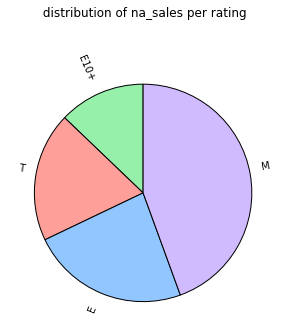

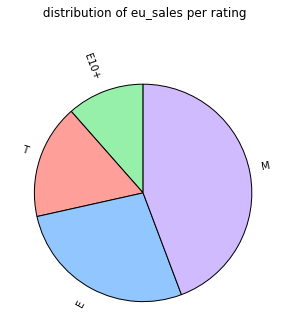

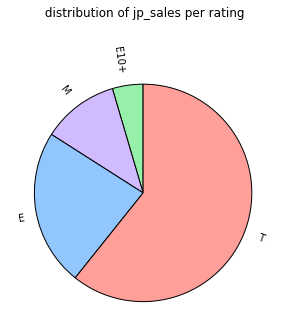

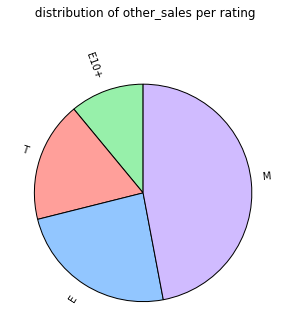

In [82]:
cdict = c_map(rating_df)
for region in regions:

    pie_chart(region, rating_df)
    

Again we can notice similar distributions for EU, NA and 'other' regions but JP has a much higher proportion of 'T' rated games and a much lower proportion of 'M' rated games. 

This is possibly due to the higher proportion of Role-Playing games and lower proportion of Shooter games sold in Japan.

### Testing hypotheses

We have been tasked to test the following hypotheses
— Average user ratings of the Xbox One and PC platforms are the same.
— Average user ratings for the Action and Sports genres are different.

We can slice the dataframe as appropriate and perform t-tests to see if the averages are statistically different at the 0.05 significance level.

H0: average user scores for games on the XOne and PC are the same

H1: average user scores for games on the XOne and PC are not the same

In [83]:
#slicing dataframe
xone_ratings = df[(df['platform'] == 'XOne') & (df['user_score'].notnull())]['user_score']
pc_ratings = df[(df['platform'] == 'PC') & (df['user_score'].notnull())]['user_score']

In [84]:
print(f'XOne mean: {xone_ratings.mean()}')
print(f'PC mean: {pc_ratings.mean()}')
print("""
""")
#performing t-test
alpha = 0.05

results = st.ttest_ind(xone_ratings, pc_ratings, equal_var = True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

XOne mean: 6.619082125603865
PC mean: 6.26625


p-value: 0.030537105478402406
We reject the null hypothesis


We therefore conclude that the average user score for PC and XOne games are significantly different at the 0.05 significance level.

Let's perform the second t-test

H0: Average user ratings for Action and Sports genres are the same

H1: Average user ratings for Action and Sports genres are the not the same

In [85]:
#slcing dataframe
action_ratings = df[(df['genre'] == 'Action') & (df['user_score'].notnull())]['user_score']
sports_ratings = df[(df['genre'] == 'Sports') & (df['user_score'].notnull())]['user_score']

In [87]:
print(f'Action mean: {action_ratings.mean()}')
print(f'Sports mean: {sports_ratings.mean()}')
print("""
""")
alpha = 0.05

results = st.ttest_ind(action_ratings, sports_ratings, equal_var = True)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

Action mean: 6.867934782608696
Sports mean: 5.195786516853933


p-value: 1.9722894298150065e-34
We reject the null hypothesis


Here we reject the null hypothesis and accept the alternate hypothesis; that average user ratings for Actions and Sports genres are not the same.

### General Conclusion

We began by preparing our data, including small changes like renaming columns and changing datatypes.
We also filled in a number of missing values, missing years using data for the same game and review scores using more complicated methods.

We first tried finding review scores for the same game and taking the median, then we found that user scores and critic scores were positively correlated. We used this to fill in missing scores, if a game had a missing `user_score`, we looked at the median of games with a similar `critic_score` and vice versa.

We also added a `total sales` column to aid with analysis.



We looked at the number of games released per year and found that there were more games being released around 2008/2009 but the number of games released has been reasonably consistent since 2013.

We found that although the PS2 and Xbox 360 had the most historical sales, platforms have an average lifecycle of ~8 years from first release to last and sales of games on the platform typically peak within the first 5 years before dying down.

From there onwards we only looked at data from 2013 onwards. We found that games on the 3DS, PS3, X360 and Wii had all seen sales decline for 3 years in a row and were likely on the way out.


We then tested whether the different in average sale per platform was statistically different for all the pairs of platforms.
We found that that many of the pairs with non-significant differences are those that have simliar markets. e.g home entertainment systems, e.g PS4 vs XOne.


We found that for all platforms except the WiiU, total sales are more highly correlated with critic scores than user scores.
For most platforms critic scores are weakly, positively correlated with total sales but have little to no correlation with user scores. We also found that whilst Action games have the most games and the most sales, the Shooter genre seems to have higher sales per game than any other genre, whilst Adventure games typically have lower sales per game.



Next was looking at a user profile for each region.
Notable findings include:

- 3DS and PSV (the only handheld consoles in our dataset) are the only platforms with higher game sales in JP than othger regions

- Microsoft's X360 and XOne are much more favoured in the NA and EU than in JP. Sony's platforms are much more popular in JP.

Looking at the distribution of sales per platform in different regions we found that the EU, NA and 'other' regions have somewhat similar proportions, the main differences being that PC games are more popular in the EU and that in the EU, a higher proportion of sales are on Playstation consoles, whilst NA prefers Xbox consoles, whilst the sales in Japan are completely dominated by Nintendo and Sony platforms.


In terms of genres per region, we found that in all regions Action games make up between a quarter and a third of sales. NA, EU and 'other all have quite similar proportions of genres making up total sales. JP is quite different, with Role-Playing making up ~25% of sales and Shooter sales being much lower in JP.

Finally we tested performed statistical test on our given hypotheses: that average user ratings of the Xbox One and PC platforms are the same and that average user ratings for the Action and Sports genres are different.

We found that the average user score for PC and XOne games are significantly different and that average user ratings for Actions and Sports genres are not the same at the 0.05 significance level.